## TITLE OF PROJECT: Stores Sales Analysis and Prediction; A Regression Perspective


## DESCRIPTION

Corporation Favorita seeks to be informed  on the stocks of products it should have at a particular point in time by analysing the demand trend of all of its products by consumers by using machine learning model forcast. The regression analysis will use past sales data to identify patterns in demand and develop a model that can accurately forecast future demand. This model will then be used to inform purchasing and stocking decisions, reducing the likelihood of stockouts and overstocking. 


## OBJECTIVE

The goal of this regression analysis is to optimize stock management at Corporation Favorita by accurately predicting demand for products in order to ensure that the right quantity of each product is always in stock. 



## HYPOTHESES

# 1

H0 - The type of day does not play a significant role in determining the demand for oil

H1 - the type of day play a significant roles in determining the demand for oil


# 2
H0 - The location does not have an impact for the for the demand for oil

H1 - The location have an impact for the demand for oil

# 3

H0 - There is no significant correlation between oil price and increase sales

H1 - There is  significant correlation between oil price and increase sales


## QUESTIONS

1. Is the train dataset complete (has all the required dates)?

2. Which dates have the lowest and highest sales for each year?

4. Are certain groups of stores selling more products? (Cluster, city, state, type)

5. Are sales affected by promotions, oil prices and holidays?

7. What analysis can we get from the date and its extractable features?

8. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)

9.  What is the relationship between oil prices and sales?

10. What is the relationship between product and sales?

11. What is the trend of sales overtime ?

12. What is the relationship between oil prices and promotion ?


## Installation

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Import Libraries


In [2]:
# Library for EDA
import pandas as pd
import numpy as np 
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.impute import SimpleImputer
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import datasets

df_stores = pd.read_csv('stores.csv')
df_trans = pd.read_csv('transactions.csv')
df_holi = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')

#Loading train & test dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


## Exploratory Data Analysis

#### Stores data

In [4]:
# The stores data - top 5
df_stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
# The stores data from bottom 5
df_stores.tail(5)

,store_nbr,city,state,type,cluster
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


In [6]:
# Checking Null values
df_stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#### Transactions data 

In [7]:
# The transaction data - top 5
df_trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
# The transactions data - bottom 5
df_trans.tail(5)

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [9]:
# Checking Null values
df_trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

#### Holidays_events data frame

In [10]:
# Holidays Event data - top 5
df_holi.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
# Holidays Event data - bottom 5
df_holi.tail(5)

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [12]:
# Checking Null values
df_holi.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

#### Oil data 

In [13]:
# The oil data - top 5
df_oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [14]:
# The oil data - bottom 5
df_oil.tail(5)

,date,dcoilwtico
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


In [15]:
# Checking Null values
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

#### Train data

In [16]:
# The Train data - top 5
df_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [17]:
# The Train data - bottom 5
df_train.tail(5)

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [18]:
# Checking Null values
df_train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

#### Test Data

In [19]:
# The Test data - top 5
df_test.head(5)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [20]:
# The Test data - bottom 5
df_test.tail(5)

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [21]:
# Checking Null values
df_test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

### Checking for all data types all the data frames

In [22]:
# Stores data types
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [23]:
# Transaction data types
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [24]:
# Holidays event data types
df_holi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [25]:
# Oil data types
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [26]:
# Train data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [27]:
# Test data types
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [28]:
df_test.nunique()

id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64

### Checking all the shape of all the data Frames

In [29]:
# Checking shapes for all datasets
print(f'Stores:{df_stores.shape}, Transaction:{df_trans.shape}, Oil:{df_oil.shape}, Train:{df_train.shape}, Test:{df_test.shape}')

Stores:(54, 5), Transaction:(83488, 3), Oil:(1218, 2), Train:(3000888, 6), Test:(28512, 5)


### Data Issues


1. 43 null values in  oil data before merge
2. More missing values after merging 


### Solution to Issues


1. Use the simple imputer after merge


In [30]:
# Function to convert date column to datetime format
def to_dateTime(df):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

# List of dataframes to convert
dataframes = [df_trans, df_holi, df_oil, df_train, df_test]

# Loop through dataframes and convert 'date' column to datetime format
for df in dataframes:
    to_dateTime(df)


In [31]:
# Checking the datetime conversion on Train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


# Merge all datasets for further EDA

In [32]:
# combine the datasets on common columns

merged_data = pd.merge(df_train, df_trans, on=['date', 'store_nbr'])


In [33]:
# Merge Holiday data to previous merged data on date column
merged_data2 = pd.merge(merged_data, df_holi, on='date')


In [34]:
# Merge Oil data to previous merged data on date column
merged_data3 = pd.merge(merged_data2, df_oil, on='date')


In [35]:
# Merge Store data to previous merged data on store_nbr column

merged_data4 = pd.merge(merged_data3, df_stores, on='store_nbr')

In [36]:
# Preview Merged data
merged_data4.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [37]:
# Rename columns using the rename method
new_merged_data = merged_data4.rename(columns={"type_x": "holiday_type", "type_y": "store_type"})

In [38]:
# Preview of new merged data - top 10
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1


In [39]:
# Preview of new merged data - bottom 10
new_merged_data.tail()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322046,3000689,2017-08-15,52,SEAFOOD,7.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11


In [40]:
# Datatypes of new merged data
new_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  int64         
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  int64         
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  int64         
 6   transactions  322047 non-null  int64         
 7   holiday_type  322047 non-null  object        
 8   locale        322047 non-null  object        
 9   locale_name   322047 non-null  object        
 10  description   322047 non-null  object        
 11  transferred   322047 non-null  bool          
 12  dcoilwtico    300003 non-null  float64       
 13  city          322047 non-null  object        
 14  state         322047 non-null  object        
 15  store_type    322

In [41]:
# Inspect data for null values
new_merged_data.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
transactions        0
holiday_type        0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
city                0
state               0
store_type          0
cluster             0
dtype: int64

In [42]:
# Preview of shape of new merged data
new_merged_data.shape                   

(322047, 17)

In [43]:
#display random sample of 5 rows
new_merged_data.sample(5, random_state = 0)

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
306623,2181590,2016-05-12,20,PET SUPPLIES,1.000,0,1399,Event,National,Ecuador,Terremoto Manabi+26,False,46.64,Quito,Pichincha,B,6
220583,2155769,2016-04-27,46,FROZEN FOODS,203.789,5,2783,Event,National,Ecuador,Terremoto Manabi+11,False,45.29,Quito,Pichincha,A,14
99610,2256622,2016-06-23,26,HOME AND KITCHEN II,0.000,0,451,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False,49.34,Guayaquil,Guayas,D,10
262757,987074,2014-07-09,54,FROZEN FOODS,18.000,0,794,Event,National,Ecuador,Mundial de futbol Brasil: Semifinales,False,102.93,El Carmen,Manabi,C,3
211484,977843,2014-07-04,45,LAWN AND GARDEN,5.000,0,3684,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False,NaN,Quito,Pichincha,A,11


In [44]:
# # Generate summary statistics for numerical columns in the DataFrame
new_merged_data.describe()

,id,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000,322047.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,1734.117840,64.077912,8.531202
std,7.862493e+05,15.595174,1246.881240,15.512095,1050.335018,25.147682,4.713809
min,5.610000e+02,1.000000,0.000000,0.000000,54.000000,27.960000,1.000000
25%,1.010616e+06,13.000000,1.000000,0.000000,1030.000000,44.660000,4.000000
50%,1.842406e+06,27.000000,19.000000,0.000000,1409.000000,51.440000,9.000000
75%,2.209556e+06,40.000000,241.260505,1.000000,2148.000000,94.740000,13.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,8359.000000,107.950000,17.000000


In [45]:
# Finding duplicated valuew
new_merged_data.duplicated().sum()

0

In [46]:
# Convert dataset to CSV 
new_merged_data.to_csv('new_merged_data.csv', index=False)

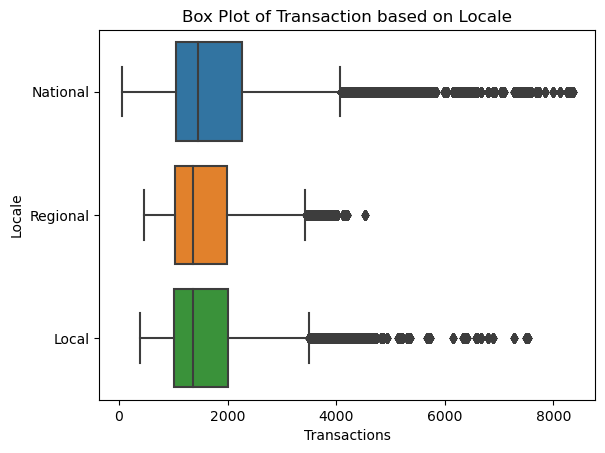

In [47]:
# Create a boxplot of the 'transactions' column grouped by 'locale'
sns.boxplot(x='transactions', y='locale', data=new_merged_data)
plt.title('Box Plot of Transaction based on Locale')
plt.xlabel('Transactions')
plt.ylabel('Locale')

# Show the plot
plt.show()


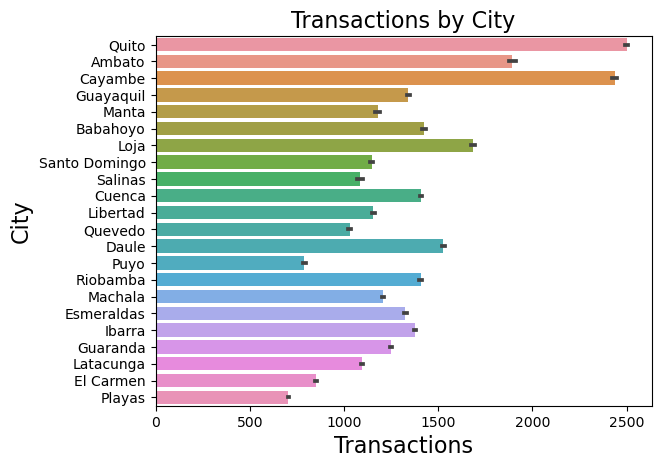

In [48]:
# sort values by transactions before plotting 
transaction_by_city=new_merged_data.sort_values(by='transactions', ascending=False)

# Create the boxplot using the Seaborn library
sns.barplot(x='transactions', y='city', data=transaction_by_city)


width=0.5,  # Adjust the width of the boxes
fliersize=3, # Adjust the size of the outliers
showmeans=True, # Show the mean value
meanline=True, # Show a line for the mean
notch=True, # Make the boxes "notched"

# Add a title and labels for the x and y axis
plt.title("Transactions by City", fontsize=16)
plt.xlabel("Transactions", fontsize=16)
plt.ylabel("City", fontsize=16)

# Show the plot
plt.show()

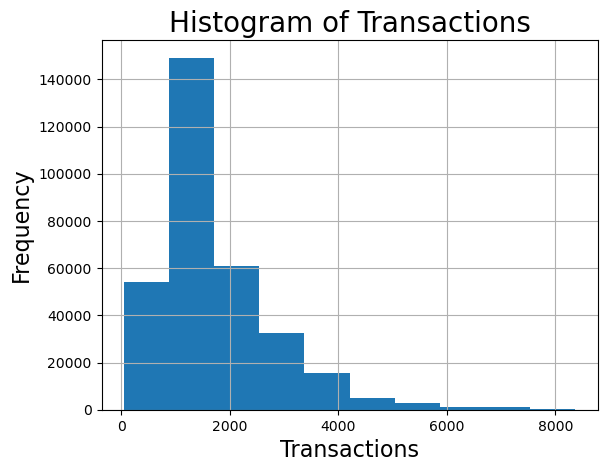

In [49]:
# Create a histogram of the 'transactions' column
new_merged_data.transactions.hist()

# Add labels to the x-axis, y-axis, and title
plt.xlabel('Transactions', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Histogram of Transactions', fontsize=20)

# Show the plot
plt.show()


In [50]:
# create a dataframe with numerical columns only
numerical_df = new_merged_data.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr_matrix = numerical_df.corr()

# display the correlation matrix
print(corr_matrix)


                    id  store_nbr     sales  onpromotion  transactions  \
id            1.000000   0.013728  0.061237     0.181707     -0.018267   
store_nbr     0.013728   1.000000  0.051349     0.025992      0.171946   
sales         0.061237   0.051349  1.000000     0.418029      0.203691   
onpromotion   0.181707   0.025992  0.418029     1.000000      0.038163   
transactions -0.018267   0.171946  0.203691     0.038163      1.000000   
dcoilwtico   -0.836786  -0.010286 -0.062568    -0.133799     -0.017944   
cluster      -0.018880  -0.075667  0.033868     0.005895      0.188876   

              dcoilwtico   cluster  
id             -0.836786 -0.018880  
store_nbr      -0.010286 -0.075667  
sales          -0.062568  0.033868  
onpromotion    -0.133799  0.005895  
transactions   -0.017944  0.188876  
dcoilwtico      1.000000  0.021655  
cluster         0.021655  1.000000  


In [51]:
#change date datatype as datetime to create new features

new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')


## Answering  Questions

### 1. Is the train dataset complete (has all the required dates)?

In [52]:
# Check for missing values
if df_train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")

# Check for missing dates in a time-series dataset
if not df_train.index.is_unique:
  print("The dataset is not complete. There are duplicate dates.")
else:
  print("The dataset is complete in the sense of not having any null or NaN values and duplicates.")


The dataset is complete in the sense of not having any null or NaN values and duplicates.


In [53]:
# missing dates
missing_date=pd.date_range(start='2013-01-01', end='2017-08-15',freq=None).difference(df_train['date'])
print(f'It is observed that: \n\n {missing_date} \n\n were missing. That is, the dates which were missing in the range given all fell on December 25th of the respective years.')  

It is observed that: 

 DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None) 

 were missing. That is, the dates which were missing in the range given all fell on December 25th of the respective years.


### 2. Which dates have the lowest and highest sales for each year?

In [54]:
# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

print(result)


   year   date_min   date_max
0  2013 2013-01-01 2013-11-12
1  2014 2014-01-01 2014-12-08
2  2015 2015-01-01 2015-11-11
3  2016 2016-02-08 2016-05-02
4  2017 2017-01-02 2017-01-02


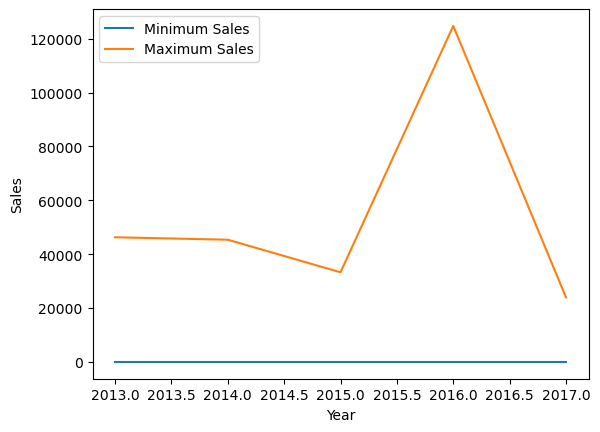

In [55]:
# Group the data by year and get the minimum and maximum sales for each year
grouped_by_year = new_merged_data.groupby("year")["sales"].agg(["min", "max"])

# Get the dates corresponding to the minimum and maximum sales for each year
result = pd.concat([new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "min"]][["year", "date"]].rename(columns={"date": "date_min"}) for year in grouped_by_year.index] +
                  [new_merged_data[new_merged_data["sales"] == grouped_by_year.loc[year, "max"]][["year", "date"]].rename(columns={"date": "date_max"}) for year in grouped_by_year.index])

# Set the index to be the year
result = result.set_index("year")

# Group the data by year to get the minimum and maximum sales on separate rows
result = result.groupby(level=0).agg({"date_min": "first", "date_max": "first"})

# Reset the index to get a regular dataframe
result = result.reset_index()

# Plot the minimum and maximum sales for each year
plt.plot(result["year"], grouped_by_year["min"], label="Minimum Sales")
plt.plot(result["year"], grouped_by_year["max"], label="Maximum Sales")

# Add a legend
plt.legend()

# Add axis labels
plt.xlabel("Year")
plt.ylabel("Sales")

# Show the plot
plt.show()


### 3. Are certain groups of stores selling more products? (Cluster, city, state, type)

In [56]:
#display random sample of 5 rows
df_stores.sample(5, random_state = 0)

,store_nbr,city,state,type,cluster
53,54,El Carmen,Manabi,C,3
33,34,Guayaquil,Guayas,B,6
48,49,Quito,Pichincha,A,11
26,27,Daule,Guayas,D,1
11,12,Latacunga,Cotopaxi,C,15


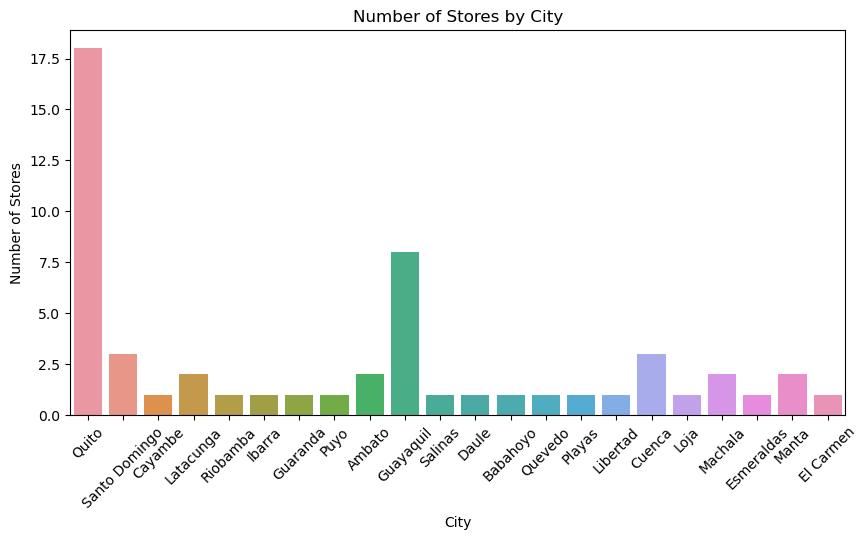

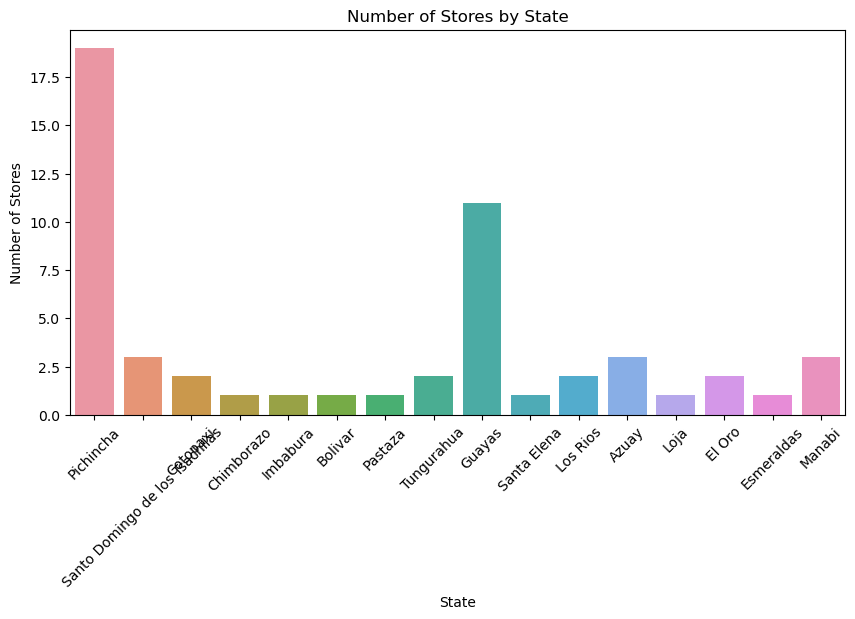

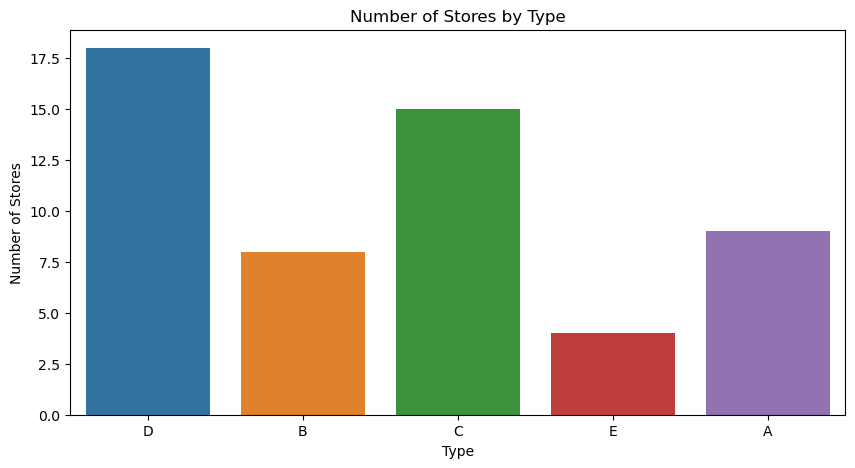

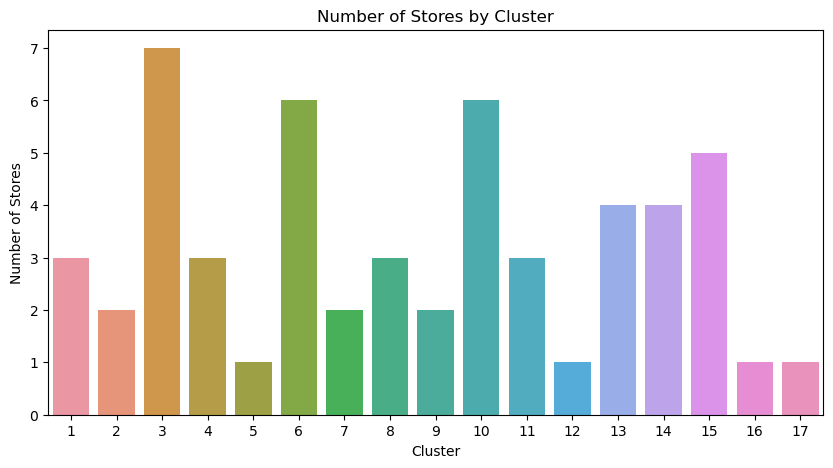

In [57]:

# Plot the number of stores by city
plt.figure(figsize=(10, 5))
sns.countplot(x='city', data=df_stores)

# Add title and labels
plt.title("Number of Stores by City")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by state
plt.figure(figsize=(10, 5))
sns.countplot(x='state', data=df_stores)

# Add title and labels
plt.title("Number of Stores by State")
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by type
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Type")
plt.xlabel("Type")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()

# Plot the number of stores by cluster
plt.figure(figsize=(10, 5))
sns.countplot(x='cluster', data=df_stores)

# Add title and labels
plt.title("Number of Stores by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Stores")

# Show the plot
plt.show()


### 5. What analysis can we get from the date and its extractable features?

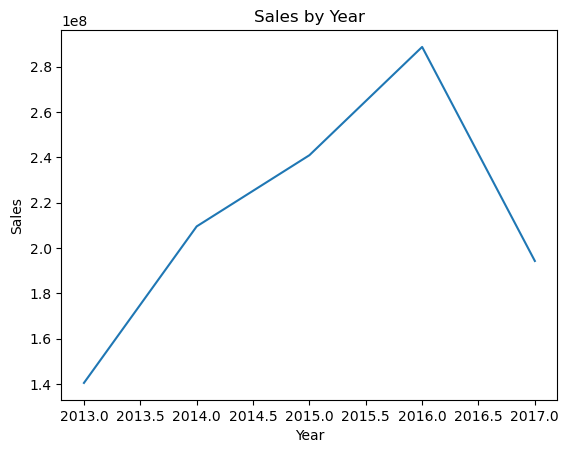

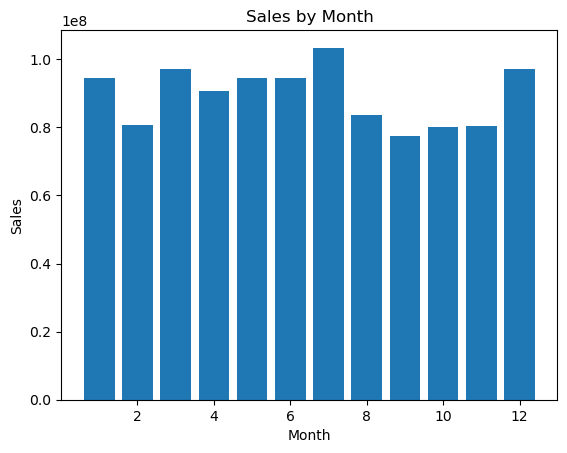

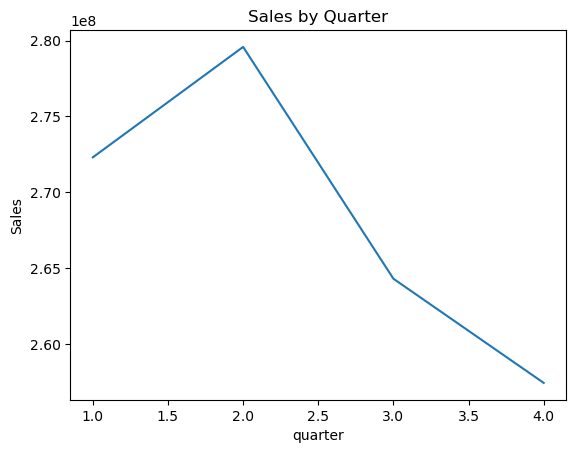

In [58]:
# create a copy of the dataframe
df_train_copy = df_train.copy()


# extract year, quarter, month, day, and weekday information from the date column
df_train_copy['year'] = df_train_copy['date'].dt.year
df_train_copy['quarter'] = df_train_copy['date'].dt.quarter
df_train_copy['month'] = df_train_copy['date'].dt.month
df_train_copy['day'] = df_train_copy['date'].dt.day
df_train_copy['weekday'] = df_train_copy['date'].dt.weekday

# group sales data by year
grouped_by_year = df_train_copy.groupby('year').sum()

# plot the aggregated sales data by year
plt.plot(grouped_by_year.index, grouped_by_year['sales'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales by Year")
plt.show()

# group sales data by month
grouped_by_month = df_train_copy.groupby('month').sum()

# plot the aggregated sales data by month
plt.bar(grouped_by_month.index, grouped_by_month['sales'])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month")
plt.show()


# group sales data by year
grouped_by_quarter = df_train_copy.groupby('quarter').sum()

# plot the aggregated sales data by quarter
plt.plot(grouped_by_quarter.index, grouped_by_quarter['sales'])
plt.xlabel("quarter")
plt.ylabel("Sales")
plt.title("Sales by Quarter")
plt.show()

### 7. What is the relationship between oil prices and sales?

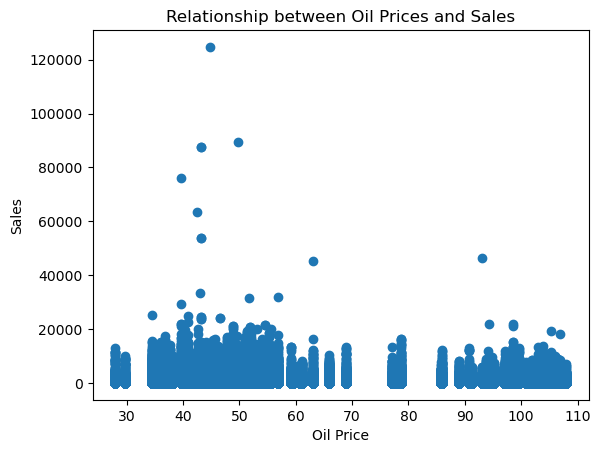

In [59]:
# Plot a scatter plot to visualize the relationship between oil prices and sales
plt.scatter(new_merged_data['dcoilwtico'], new_merged_data['sales'])
plt.xlabel('Oil Price')
plt.ylabel('Sales')
plt.title('Relationship between Oil Prices and Sales')
plt.show()


### 8. What is the relationship between product and sales?

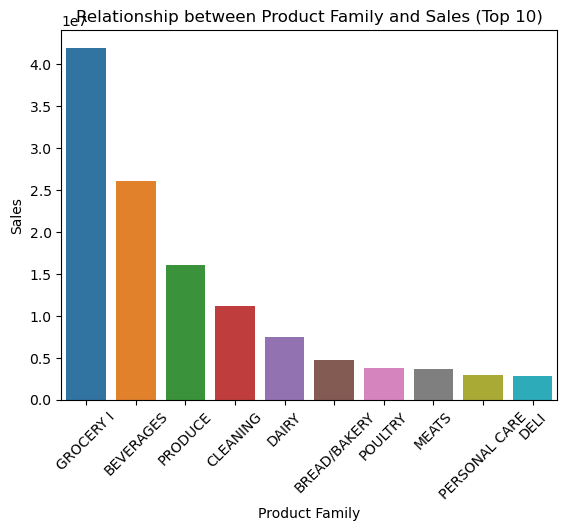

In [60]:

# Group data by product family and sum the sales
grouped_data_1 = new_merged_data.groupby('family').sum()['sales']

# Sort the data by sales
grouped_data_1 = grouped_data_1.sort_values(ascending=False)

# Plot the top 10 product families
sns.barplot(x=grouped_data_1.index[:10], y=grouped_data_1.values[:10])

# Add labels and title
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.title('Relationship between Product Family and Sales (Top 10)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### 9. What is the trend of sales overtime

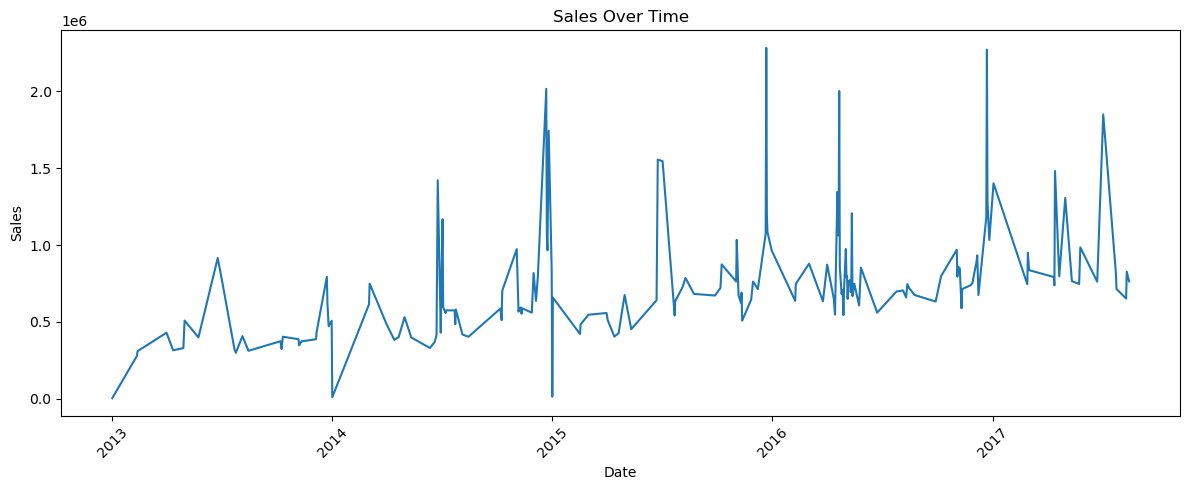

In [61]:

# Group data by date and sum the sales
date_group = new_merged_data.groupby("date").sum()

# Plot the sales over time
plt.figure(figsize=(12,5))
plt.plot(date_group.index, date_group["sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Feature Processing & Engineering
This section is to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [62]:
#checking duplicates in the train data
new_merged_data.duplicated().sum()

0

In [63]:
# Drop the specified columns
new_merged_data = new_merged_data.drop(columns=["year", "month", "dayofmonth", "dayofweek", "dayname"])


In [64]:
new_merged_data

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster
0,561,2013-01-01,25,AUTOMOTIVE,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
1,562,2013-01-01,25,BABY CARE,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
2,563,2013-01-01,25,BEAUTY,2.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
3,564,2013-01-01,25,BEVERAGES,810.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
4,565,2013-01-01,25,BOOKS,0.000,0,770,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Salinas,Santa Elena,D,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000685,2017-08-15,52,POULTRY,397.340,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322043,3000686,2017-08-15,52,PREPARED FOODS,104.418,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322044,3000687,2017-08-15,52,PRODUCE,3803.368,8,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11
322045,3000688,2017-08-15,52,SCHOOL AND OFFICE SUPPLIES,17.000,0,2255,Holiday,Local,Riobamba,Fundacion de Riobamba,False,47.57,Manta,Manabi,A,11


## New Features Creation

In [65]:
#change date datatype as datetime to create new features

new_merged_data.date = pd.to_datetime(new_merged_data.date)


new_merged_data['year'] = new_merged_data.date.dt.year

new_merged_data['month'] = new_merged_data.date.dt.month


new_merged_data['dayofmonth'] = new_merged_data.date.dt.day


new_merged_data['dayofweek'] = new_merged_data.date.dt.dayofweek


new_merged_data['dayname'] = new_merged_data.date.dt.strftime('%A')



In [66]:
# Preview data with new features
new_merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,locale,locale_name,...,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,562,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,563,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,564,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,565,2013-01-01,25,BOOKS,0.0,0,770,Holiday,National,Ecuador,...,NaN,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


## Impute Missing Values

In [67]:
from sklearn.impute import SimpleImputer

# create an instance of the SimpleImputer class with mean strategy
imputer = SimpleImputer(strategy='mean')

# fit the imputer to the dcoilwtico column of new_merged_data
imputer.fit(new_merged_data[['dcoilwtico']])

# use the imputer to transform the dcoilwtico column of new_merged_data, replacing missing values with the mean value
new_merged_data['dcoilwtico'] = imputer.transform(new_merged_data[['dcoilwtico']])


In [68]:
# Preview data columns after imputing
new_merged_data.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
city            0
state           0
store_type      0
cluster         0
year            0
month           0
dayofmonth      0
dayofweek       0
dayname         0
dtype: int64

In [69]:
# Write the DataFrame to a CSV file
new_merged_data.to_csv('new_merged_data.csv', index=False)

In [70]:
#drop unnecessary columns
final_data = new_merged_data.drop(columns=['id','locale', 'locale_name', 'description', 'transferred'], inplace=True)


In [71]:
new_merged_data.head()

,date,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
0,2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
1,2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2,2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
3,2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
4,2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [72]:
# set the date column as the index
new_merged_data.set_index('date', inplace=True)

In [73]:
new_merged_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,state,store_type,cluster,year,month,dayofmonth,dayofweek,dayname
date,,,,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday
2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,Santa Elena,D,1,2013,1,1,1,Tuesday


In [74]:
# drop more columns

final_data = new_merged_data.drop(columns=['state',  'store_type', 'dayname'], inplace=True)

In [75]:
final_data = new_merged_data.copy()

In [76]:
final_data.head()

,store_nbr,family,sales,onpromotion,transactions,holiday_type,dcoilwtico,city,cluster,year,month,dayofmonth,dayofweek
date,,,,,,,,,,,,,
2013-01-01,25,AUTOMOTIVE,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BABY CARE,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BEAUTY,2.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BEVERAGES,810.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1
2013-01-01,25,BOOKS,0.0,0,770,Holiday,64.077912,Salinas,1,2013,1,1,1


In [77]:
# categorizing the products
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
final_data['family'] = np.where(final_data['family'].isin(food_families), 'FOODS', final_data['family'])
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
final_data['family'] = np.where(final_data['family'].isin(home_families), 'HOME', final_data['family'])
clothing_families = ['LINGERIE', 'LADYSWARE']
final_data['family'] = np.where(final_data['family'].isin(clothing_families), 'CLOTHING', final_data['family'])
grocery_families = ['GROCERY I', 'GROCERY II']
final_data['family'] = np.where(final_data['family'].isin(grocery_families), 'GROCERY', final_data['family'])
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
final_data['family'] = np.where(final_data['family'].isin(stationery_families), 'STATIONERY', final_data['family'])
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
final_data['family'] = np.where(final_data['family'].isin(cleaning_families), 'CLEANING', final_data['family'])
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']
final_data['family'] = np.where(final_data['family'].isin(hardware_families), 'HARDWARE', final_data['family'])

In [78]:
from sklearn.preprocessing import StandardScaler

# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico', 'year', 'month', 'dayofmonth', 'dayofweek']

# fit and transform the numerical columns
final_data[num_cols] = scaler.fit_transform(final_data[num_cols])


## Features Encoding


In [79]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ["family", "city", "holiday_type"]
categorical_data = final_data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data to one hot encoding
one_hot_encoded_data = encoder.fit_transform(categorical_data)

# Get the categories for each column
categories = [encoder.categories_[i] for i in range(len(encoder.categories_))]

# Create the column names for the one hot encoded data
column_names = []
for i in range(len(categories)):
    for j in range(len(categories[i])):
        column_names.append(f'{categorical_columns[i]}_{categories[i][j]}')

# Convert the one hot encoding data to a DataFrame
one_hot_encoded_data = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)


# Reset the index of both dataframes
final_data = final_data.reset_index(drop=True)
one_hot_encoded_data = one_hot_encoded_data.reset_index(drop=True)

# Concatenate the original dataframe with the one hot encoded data
final_data_encoded = pd.concat([final_data, one_hot_encoded_data], axis=1)

# Drop the original categorical columns
final_data_encoded.drop(categorical_columns, axis=1, inplace=True)



In [80]:
final_data_encoded.head()

,store_nbr,sales,onpromotion,transactions,dcoilwtico,cluster,year,month,dayofmonth,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
#Rename dcoilwtico column to oil price
final_data_encoded.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)


In [82]:
final_data_encoded.head()

,store_nbr,sales,onpromotion,transactions,oil_price,cluster,year,month,dayofmonth,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [83]:
# Make a copy of the final_data_encoded as data
data = final_data_encoded.copy()

In [84]:
data.head()

,store_nbr,sales,onpromotion,transactions,oil_price,cluster,year,month,dayofmonth,dayofweek,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25,-0.324316,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25,0.323701,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25,-0.325920,0,-0.917916,-5.854904e-16,1,-1.613649,-1.970502,-1.491163,-0.666671,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


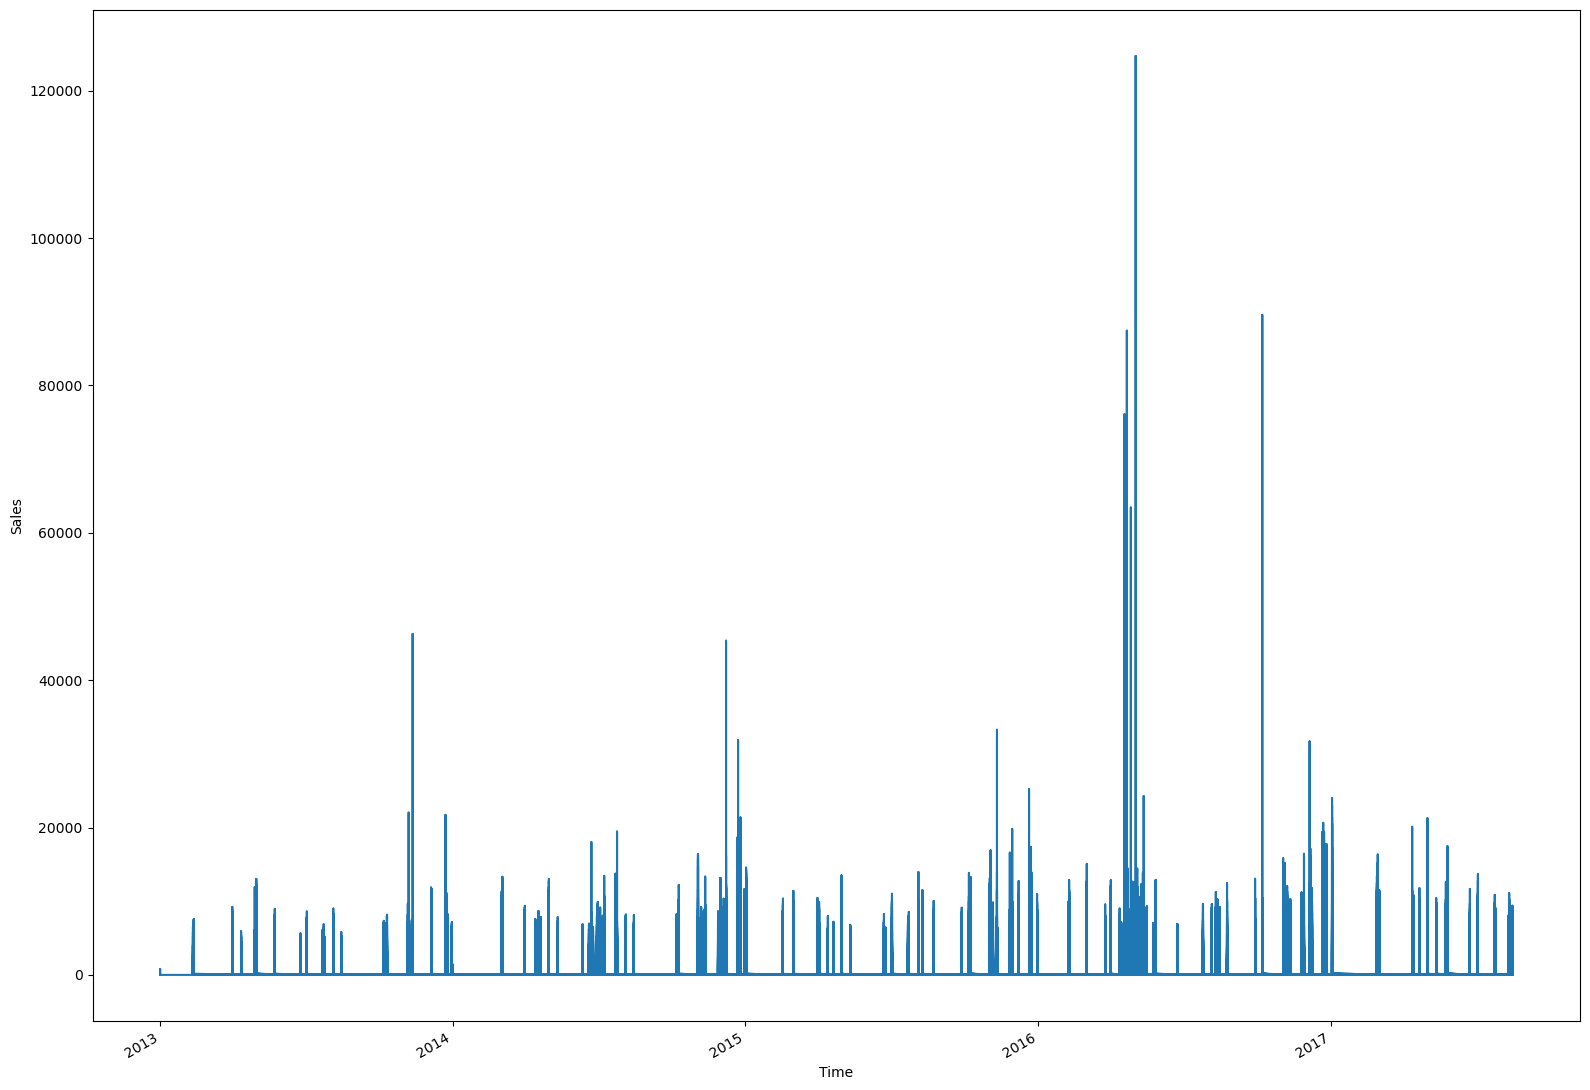

In [85]:
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(new_merged_data['sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
fig.autofmt_xdate()
plt.tight_layout()

In [86]:
# Write the DataFrame to a CSV file
data.to_csv('encoded_data.csv', index=False)

# Machine Learning Modeling


Here is the section to build, train, evaluate and compare the models to each others.

### Create and Train the Model

In [87]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [88]:
# Split Data to train and Test
from sklearn.model_selection import train_test_split

# Create the feature dataframe using the selected columns
X = data.drop(["sales"], axis=1)

# Get the target variable
y = data.sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression Model

In [89]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make prediction on X_test
lr_predictions = lr.predict(X_test)


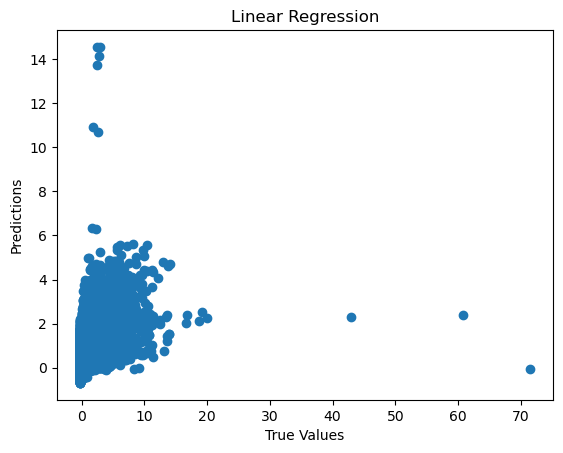

In [90]:
# diagram on the prediction
plt.scatter(y_test, lr_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.show()


In [91]:
# Evaluation Metrics for Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions).round(2)
lr_rmse = np.sqrt(lr_mse).round(2)

In [92]:
# apply the absolute value function to y_test to remove negative signs
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)


In [93]:
# calculate the mean squared logarithmic error using the new y_test_abs and lr_predictions_abs array
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs)).round(2)

In [94]:
# Print the evaluation results for Linear Regression model
print("\nEvaluation Results for Linear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("RMSLE:", lr_rmsle)


Evaluation Results for Linear Regression:
MSE: 0.72
RMSE: 0.85
RMSLE: 0.26


### Decision Tree Regression Model

In [95]:
# Decision Tree Regression Model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make prediction on X_test
dt_predictions = dt.predict(X_test)

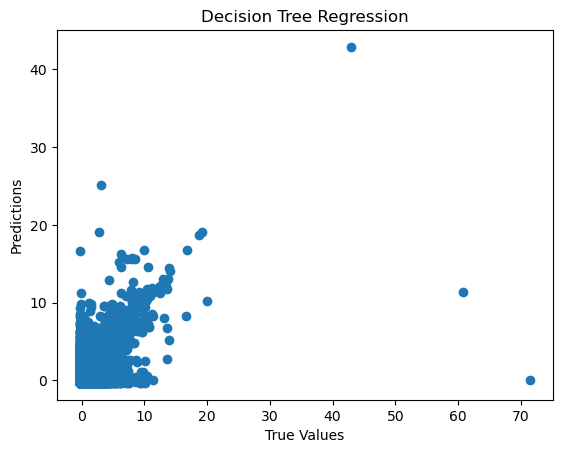

In [96]:
plt.scatter(y_test, dt_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Decision Tree Regression")
plt.show()

In [97]:
# Evaluation Metrics for Decision Tree Regression
dt_mse = mean_squared_error(y_test, dt_predictions).round(2)
dt_rmse = np.sqrt(dt_mse).round(2)


In [98]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
dt_predictions_abs = abs(dt_predictions)


In [99]:
# calculate the mean squared logarithmic error using the new y_test_abs and dt_predictions_abs array

dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs)).round(2)

In [100]:
# Print the evaluation results for Decision Tree Regression model
print("\nEvaluation Results for Decision Tree Regression:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)

print("RMLSE:", dt_rmsle)


Evaluation Results for Decision Tree Regression:
MSE: 0.58
RMSE: 0.76
RMLSE: 0.24


### XGBoost

In [101]:
# XGBoost Model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)


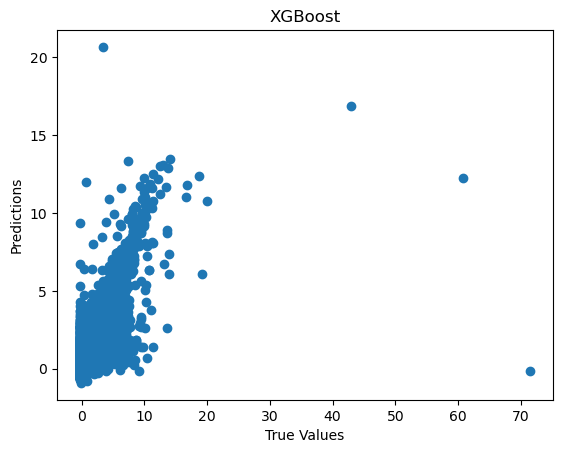

In [102]:
plt.scatter(y_test, xgb_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("XGBoost")
plt.show()

In [103]:
# Evaluation Metrics for XGBoost
xgb_mse = mean_squared_error(y_test, xgb_predictions).round(2)
xgb_rmse = np.sqrt(xgb_mse).round(2)

In [104]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
xgb_predictions_abs = abs(xgb_predictions)

In [105]:
# calculate the mean squared logarithmic error using the new y_test_abs and xgb_predictions_abs array

xgb_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs)).round(2)

In [106]:
# Print the evaluation results for XGBoost model
print("\nEvaluation Results for XGBoost:")
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("RMSLE:", xgb_rmsle)


Evaluation Results for XGBoost:
MSE: 0.4
RMSE: 0.63
RMSLE: 0.2


### Random Forest Regression Model

In [107]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make prediction on X_test
rf_predictions = rf.predict(X_test)

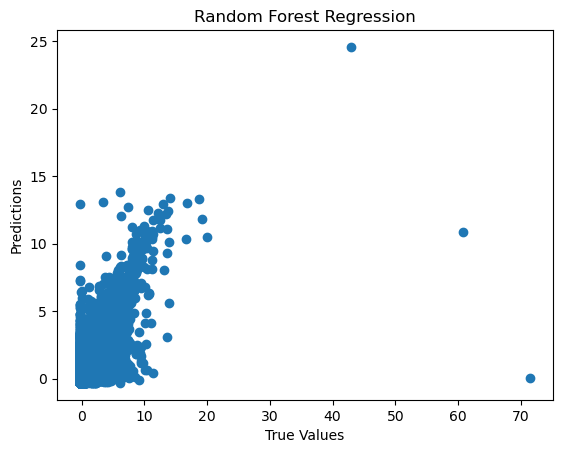

In [108]:
plt.scatter(y_test, rf_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression")
plt.show()

In [109]:
# Evaluation Metrics for Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_predictions).round(2)
rf_rmse = np.sqrt(rf_mse).round(2)
#rf_rmsle = np.sqrt(mean_squared_error(np.log(y_test), np.log(rf_predictions)))

In [110]:
# apply the absolute value function to y_test to remove negative signs
#y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)


In [111]:
# calculate the mean squared logarithmic error using the new y_test_abs and rf_predictions_abs array

rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs)).round(2)

In [112]:
# Print the evaluation results for Random Forest Regrression model
print("\nEvaluation Results for Random Forest:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("RMSLE:", rf_rmsle)


Evaluation Results for Random Forest:
MSE: 0.44
RMSE: 0.66
RMSLE: 0.21


## Evaluating Models Created and Trained

In [113]:
# Create a table to compare the evaluation results
results_table = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree', 'XGBoost', 'Random Forest'],
                              'MSE': [lr_mse, dt_mse, xgb_mse, rf_mse],
                              'RMSE': [lr_rmse, dt_rmse, xgb_rmse, rf_rmse],
                              'RMSLE': [lr_rmsle, dt_rmsle, xgb_rmsle, rf_rmsle]})

# Print the comparison table
print("\nComparison Table of Evaluation Results:")
print(results_table)



Comparison Table of Evaluation Results:
               Model   MSE  RMSE  RMSLE
0  Linear Regression  0.72  0.85   0.26
1      Decision Tree  0.58  0.76   0.24
2            XGBoost  0.40  0.63   0.20
3      Random Forest  0.44  0.66   0.21
